## Feed Forward Neural Network used to recognize handwritten digits

1. Each handwritten digit is an image with 28 x 28 pixels (784 pixels in total)
2. Each pixel takes the value of 0 - 255 (0: black, 255: white)
3. The model gets an image as input (the 784 pixels values) and outputs a prediction.
4. The model has 64 neurons in the inner layer and 10 neurons in the outer layer.
5. The inner layer uses the ReLu activation function and the outer layer uses SoftMax.
6. The model is trained in 800 epochs and with a learning rate of 0.005.

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
test_df = pd.read_csv('mnist_test.csv')
train_df = pd.read_csv('mnist_train.csv')

In [3]:
'''
1. Convert pandas dfs to numpy arrays
2. Transpose the array
3. Split the arrays into labels and data
'''
test_array = np.array(test_df)
np.random.shuffle(test_array)
test_array = test_array.T
test_labels = test_array[0]
test_data = test_array[1:]
test_data = test_data.astype('float32') / 255.0

train_array = np.array(train_df)
np.random.shuffle(train_array)
train_array = train_array.T
train_labels = train_array[0]
train_data = train_array[1:]
train_data = train_data.astype('float32') / 255.0

In [4]:
def init_params():
    """ Randomly initialize weights and biases for each layer using He initialization technique"""

    w1 = np.random.randn(64, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((64, 1))

    w2 = np.random.randn(10, 64) * np.sqrt(2. / 64)
    b2 = np.zeros((10, 1))

    return w1, b1, w2, b2

In [5]:
def relu(Z):
    """ ReLU activation function """

    return np.maximum(0, Z)

def softmax(Z):
    """ Softmax activation function """

    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(data, w1, b1, w2, b2):
    """ Calculate the output of the network for a given input """

    Z1 = w1.dot(data) + b1 
    A1 = relu(Z1)

    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(labels):

    one_hot_labels = np.zeros((labels.size, labels.max() + 1)) 
    one_hot_labels[np.arange(labels.size), labels] = 1
    one_hot_labels = one_hot_labels.T

    return one_hot_labels

def deriv_relu(Z):
    """ Derivative of ReLU activation function """

    return Z > 0

def back_prop(Z1, A1, Z2, A2, w1, w2, data, labels):
    """ Calculate the gradient of the network for a given input """

    m = labels.size

    one_hot_labels = one_hot(labels) 
    dZ2 = A2 - one_hot_labels
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = w2.T.dot(dZ2) * deriv_relu(Z1)
    dw1 = 1 / m * dZ1.dot(data.T)
    db1 = 1 / m * np.sum(dZ1)

    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    """ Update the parameters of the network """
    w1 = w1 - alpha * dw1 
    b1 = b1 - alpha * db1

    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    return w1, b1, w2, b2
    

In [6]:
def shuffle_data(data, labels):
    indices = np.arange(data.shape[1])

    np.random.shuffle(indices)

    shuffled_data = data[:, indices]
    shuffled_labels = labels[indices]

    return shuffled_data, shuffled_labels

In [7]:
def get_predictions(A2):
    """ Find the index of the maximum value in the output of the network """
    return np.argmax(A2, 0) 

def get_accuracy(predictions, labels):
    return np.sum(predictions == labels) / labels.size

def gradient_descent(data, labels, epochs, alpha=0.001):
    """ Train the network using gradient descent """

    w1, b1, w2, b2 = init_params()

    for i in range(epochs):

        data, labels = shuffle_data(data, labels)

        Z1, A1, Z2, A2 = forward_prop(data, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = back_prop(Z1, A1, Z2, A2, w1, w2, data, labels)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print(f"Epoch: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), labels)}")

    return w1, b1, w2, b2

In [8]:
w1, b1, w2, b2 = gradient_descent(train_data, train_labels, 800, 0.005)

Epoch: 0
Accuracy: 0.09596666666666667
Epoch: 10
Accuracy: 0.117
Epoch: 20
Accuracy: 0.1445
Epoch: 30
Accuracy: 0.17563333333333334
Epoch: 40
Accuracy: 0.20955
Epoch: 50
Accuracy: 0.24288333333333334
Epoch: 60
Accuracy: 0.27735
Epoch: 70
Accuracy: 0.30938333333333334
Epoch: 80
Accuracy: 0.3390166666666667
Epoch: 90
Accuracy: 0.3645833333333333
Epoch: 100
Accuracy: 0.38855
Epoch: 110
Accuracy: 0.40985
Epoch: 120
Accuracy: 0.42941666666666667
Epoch: 130
Accuracy: 0.4467
Epoch: 140
Accuracy: 0.46455
Epoch: 150
Accuracy: 0.482
Epoch: 160
Accuracy: 0.5000333333333333
Epoch: 170
Accuracy: 0.5162666666666667
Epoch: 180
Accuracy: 0.5333166666666667
Epoch: 190
Accuracy: 0.5510833333333334
Epoch: 200
Accuracy: 0.5689833333333333
Epoch: 210
Accuracy: 0.5862666666666667
Epoch: 220
Accuracy: 0.6022166666666666
Epoch: 230
Accuracy: 0.6183
Epoch: 240
Accuracy: 0.6331833333333333
Epoch: 250
Accuracy: 0.64745
Epoch: 260
Accuracy: 0.6599333333333334
Epoch: 270
Accuracy: 0.6721666666666667
Epoch: 280
Acc

In [9]:
def make_predictions(input, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(input, w1, b1, w2, b2)

    predictions = get_predictions(A2)

    return predictions


def test_prediction(index, w1, b1, w2, b2):
    current_image = train_data[:, index, None]

    prediction = make_predictions(current_image, w1, b1, w2, b2)

    label = train_labels[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()


Prediction:  [5]
Label:  5


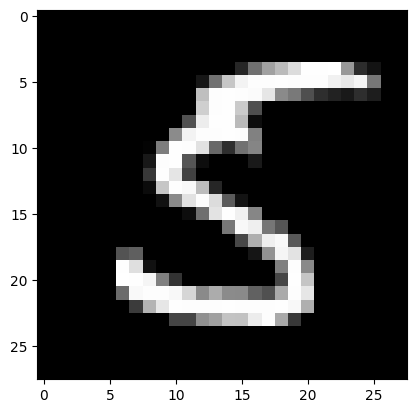

In [17]:
test_prediction(12, w1, b1, w2, b2)

In [11]:
dev_predictions = make_predictions(test_data, w1, b1, w2, b2)
get_accuracy(dev_predictions, test_labels)

0.8417